# Импорт

In [ ]:
!pip install tensorflow
import tensorflow as tf


In [ ]:
print(tf.__version__)
print(tf.executing_eagerly())

2.17.1
True


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pickle
import shutil
from PIL import Image
import pandas as pd
import zipfile
from zipfile import ZipFile
from io import BytesIO
from PIL import Image
from google.colab import drive
import glob


import os
print(os.getcwd())



/content


# Подключение диска

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
for dirname, _, filenames in os.walk('/content'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/.config/.last_survey_prompt.yaml
/content/.config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db
/content/.config/default_configs.db
/content/.config/.last_update_check.json
/content/.config/gce
/content/.config/config_sentinel
/content/.config/.last_opt_in_prompt.yaml
/content/.config/active_config
/content/.config/logs/2025.01.16/14.28.58.277099.log
/content/.config/logs/2025.01.16/14.28.59.271536.log
/content/.config/logs/2025.01.16/14.28.49.862607.log
/content/.config/logs/2025.01.16/14.28.29.838121.log
/content/.config/logs/2025.01.16/14.29.08.514080.log
/content/.config/logs/2025.01.16/14.29.07.896294.log
/content/.config/configurations/config_default
/content/drive/MyDrive/ВЛР I семестр.zip
/content/drive/MyDrive/Лабараторная работа 28 Чеботарев Рт-1.doc
/content/drive/MyDrive/Лабараторная работа №9 РТ-1 К. В. Чеботарев.zip
/content/drive/MyDrive/Конспект 8 Чеботарев  РТ-1.zip
/content/drive/MyDrive/Лабараторная работа 28 Чеботарев Рт-1.zip
/content/driv

In [ ]:
#path_to_zip_file = '/content/drive/My Drive/Proj_Data.zip'
# Создайте директорию, куда будет распакован архив
#directory_to_extract_to = '/content/drive/My Drive/extracted_images'
#os.makedirs(directory_to_extract_to, exist_ok=True)
# Распакуйте архив
#with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
  #zip_ref.extractall(directory_to_extract_to)

# Работа с изображениями

In [ ]:
classes = [ 'Amarant', 'Cabbage', 'Watercress']
directory_to_extract_to = '/content/drive/My Drive/Proj_img'
image_df = pd.DataFrame(columns = ['X','y'])
images_set = []
for e in classes:
  dir = directory_to_extract_to  + f'/{e}'
  # Получите список всех файлов изображений в директории
  images_path = glob.glob(dir + '/*.jpg') # Или другой формат изображения
  # Считайте изображения
  images = [Image.open(img_path) for img_path in images_path]

  images_set.append(images)

In [ ]:
print(images_set)

[[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7B947F2B8790>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7B947E8E0850>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7B947F2B8890>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7B947E8F8390>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7B947F2AC410>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7B947F2AC690>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7B947F247650>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7B947E8E0B50>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7B947F25A990>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7B947F246B50>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7B947F2AC4D0>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7B947

In [ ]:
for dirname, _, filenames in os.walk('/content'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        # Проходим по всем файлам в архиве


/content/.config/.last_survey_prompt.yaml
/content/.config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db
/content/.config/default_configs.db
/content/.config/.last_update_check.json
/content/.config/gce
/content/.config/config_sentinel
/content/.config/.last_opt_in_prompt.yaml
/content/.config/active_config
/content/.config/logs/2025.01.16/14.28.58.277099.log
/content/.config/logs/2025.01.16/14.28.59.271536.log
/content/.config/logs/2025.01.16/14.28.49.862607.log
/content/.config/logs/2025.01.16/14.28.29.838121.log
/content/.config/logs/2025.01.16/14.29.08.514080.log
/content/.config/logs/2025.01.16/14.29.07.896294.log
/content/.config/configurations/config_default
/content/drive/MyDrive/ВЛР I семестр.zip
/content/drive/MyDrive/Лабараторная работа 28 Чеботарев Рт-1.doc
/content/drive/MyDrive/Лабараторная работа №9 РТ-1 К. В. Чеботарев.zip
/content/drive/MyDrive/Конспект 8 Чеботарев  РТ-1.zip
/content/drive/MyDrive/Лабараторная работа 28 Чеботарев Рт-1.zip
/content/driv

# Полезные методы

In [ ]:






#cv2_image = cv2.cvtColor(np.array(pil_image), cv2.COLOR_RGB2BGR)
#image_rgb = cv2.cvtColor(image_cv2, cv2.COLOR_BGR2RGB)
#image_pillow = Image.fromarray(image_rgb)
def crop_img(image_CV2, size_x, size_y):
    image = image_CV2

    # Получение размеров изображения
    height, width = image.shape[:2]

    # Определение размера центральной части
    center_x, center_y = height // 2, width // 2

    crop_size_x = (size_x // 224 - 0) * 224
    crop_size_y = (size_y // 224 - 0) * 224

    # Определение координат для обрезки
    x1, y1 = center_x - crop_size_x // 2, center_y - crop_size_y // 2
    x2, y2 = center_x + crop_size_x // 2, center_y + crop_size_y // 2
    print(x1, y1, x2, y2)
    # Вырезание центральной части изображения
    cropped_image = image[y1:y2, x1:x2]
    return cropped_image


#img_dirs = ['C:/Proj_Data/Amarant', 'C:/Proj_Data/Cabbage', 'C:/Proj_Data/Watercress']

def slice_image(image_PIL, chunk_size, tmp_set):
    image = image_PIL
    width, height = image.size

    for x in range(0, width, chunk_size):
        for y in range(0, height, chunk_size):
            box = (x, y, x + chunk_size, y + chunk_size)
            region = image.crop(box)
            #region.save(f'chunk_{x}_{y}.png')
            tmp_set.append(region)


chunk_size = 224
#slice_image(image_path, chunk_size)



# Задаем путь к директории, в которой будут создаваться папки
output_path = "C:/Proj_Data/data"



# Создание папок с названиями классов





# Продолжаем работать с картинками

In [ ]:
images_set_2 = []
for img_set in images_set:
  tmp_set = []
  for img in img_set:
    tmp = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    height, width, chans = tmp.shape
    image = crop_img(tmp, height, width)
    tmp_set.append(image)
  images_set_2.append(tmp_set)
images_set = []

48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 720 960
48 64 

In [ ]:
print(images_set_2)

[[array([[[203, 199, 198],
        [203, 200, 196],
        [203, 199, 198],
        ...,
        [152, 150, 149],
        [149, 147, 146],
        [150, 147, 143]],

       [[205, 201, 200],
        [206, 201, 198],
        [207, 204, 200],
        ...,
        [150, 146, 145],
        [148, 143, 144],
        [148, 143, 142]],

       [[207, 203, 202],
        [209, 205, 204],
        [211, 207, 206],
        ...,
        [157, 156, 152],
        [156, 154, 153],
        [158, 155, 151]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [208, 216, 215],
        [208, 216, 215],
        [208, 216, 215]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [205, 216, 214],
        [205, 216, 214],
        [207, 215, 214]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [204, 215, 213],
        [204, 215, 213],
        [205, 213, 212

In [ ]:
images_set_3 = []
for img_set in images_set_2:
  tmp_set = []
  for img in img_set:
    tmp = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    image_pillow = Image.fromarray(tmp)
    slice_image(image_pillow, 224, tmp_set)
  print(len(tmp_set))
  while(len(tmp_set) < 360):
    tmp_set = tmp_set + tmp_set
  images_set_3.append(tmp_set[0: 360])
images_set_2 = []

324
360
216


In [ ]:
for akd in images_set_3:
  print(len(akd))

360
360
360


In [ ]:
print(images_set_3)

[[<PIL.Image.Image image mode=RGB size=224x224 at 0x7B948C429DD0>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7B948A5594D0>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7B947F2598D0>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7B947E912D50>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7B947E912E10>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7B947E912F10>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7B947E912F50>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7B947E913090>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7B947E9130D0>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7B947E912E90>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7B947E9131D0>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7B947E9132D0>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7B947E8D0950>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7B947E92FF10>, <PIL.Image.Image image mode=RGB size=224x224 at 0x7B947E913390>, <PIL.Image.Image image 

In [ ]:
images_set_4 = []
for img_set in images_set_3:
  tmp_set = []
  for img in img_set:
    tmp = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    tmp_set.append(tmp)
  images_set_4.append(tmp_set)
images_set_3 = []

In [ ]:
#img_df = pd.DataFrame(data = images_set_3, columns = classes)
list_x = []
list_y = []
for i in range(3):
   list_x = list_x + images_set_4[i]
   list_y = list_y + [i for j in range(360)]
print(list_y)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
print(image_df)

Empty DataFrame
Columns: [X, y]
Index: []


In [ ]:
final_df = pd.DataFrame({'X': list_x, 'y': list_y})

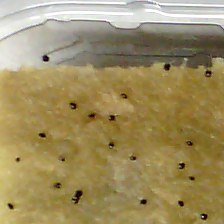

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(final_df['X'][0])

In [ ]:
print(final_df['X'])

0       [[[203, 199, 198], [203, 200, 196], [203, 199,...
1       [[[120, 190, 203], [120, 189, 204], [119, 188,...
2       [[[136, 200, 211], [130, 199, 209], [128, 197,...
3       [[[255, 255, 255], [255, 255, 255], [255, 255,...
4       [[[195, 199, 194], [198, 199, 195], [198, 199,...
                              ...                        
1075    [[[206, 208, 202], [207, 209, 203], [207, 209,...
1076    [[[199, 211, 211], [194, 206, 208], [193, 203,...
1077    [[[47, 80, 100], [48, 84, 102], [40, 84, 101],...
1078    [[[74, 130, 135], [72, 128, 133], [73, 125, 13...
1079    [[[178, 179, 175], [175, 174, 170], [176, 176,...
Name: X, Length: 1080, dtype: object


# ...

In [ ]:
def map_f(x):
  return np.array(x)

x = list(map(map_f,  final_df['X'].to_list()))
#final_df['X'].map(map_f, )
y = final_df['y']
print(len(y))

1080


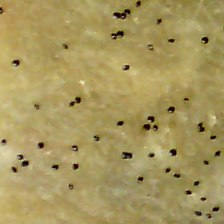

In [ ]:
cv2_imshow(x[13])

In [ ]:
for dirname, _, filenames in os.walk('/content/images_2'):
    for filename in filenames:
        os.remove(f'{dirname}/{filename}' )

In [ ]:

imgs_dir = '/content/images_2'
os.makedirs(imgs_dir, exist_ok=True)
for dir in classes:
  os.makedirs(f'{imgs_dir}/{dir}', exist_ok=True)


In [ ]:
for i in range(3):
  for j in range(len(images_set_4[i])):
    cv2.imwrite(f'/content/images_2/{classes[i]}/{j}.jpg', images_set_4[i][j])


In [ ]:
for dirname, _, filenames in os.walk('/content/images_2'):
  for filename in filenames:
    print(f'{dirname}/{filename}')

/content/images_2/Cabbage/233.jpg
/content/images_2/Cabbage/23.jpg
/content/images_2/Cabbage/318.jpg
/content/images_2/Cabbage/71.jpg
/content/images_2/Cabbage/256.jpg
/content/images_2/Cabbage/52.jpg
/content/images_2/Cabbage/352.jpg
/content/images_2/Cabbage/129.jpg
/content/images_2/Cabbage/38.jpg
/content/images_2/Cabbage/286.jpg
/content/images_2/Cabbage/270.jpg
/content/images_2/Cabbage/304.jpg
/content/images_2/Cabbage/278.jpg
/content/images_2/Cabbage/128.jpg
/content/images_2/Cabbage/36.jpg
/content/images_2/Cabbage/9.jpg
/content/images_2/Cabbage/357.jpg
/content/images_2/Cabbage/58.jpg
/content/images_2/Cabbage/277.jpg
/content/images_2/Cabbage/136.jpg
/content/images_2/Cabbage/26.jpg
/content/images_2/Cabbage/225.jpg
/content/images_2/Cabbage/266.jpg
/content/images_2/Cabbage/203.jpg
/content/images_2/Cabbage/298.jpg
/content/images_2/Cabbage/96.jpg
/content/images_2/Cabbage/321.jpg
/content/images_2/Cabbage/103.jpg
/content/images_2/Cabbage/170.jpg
/content/images_2/Cabbag

# Учим модель

In [ ]:
print(tf.executing_eagerly())

True


In [ ]:
from re import X
import pickle
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19

# Каталог с набором данных
data_dir = '/content/images_2'

#tf.compat.v1.disable_eager_execution()

early_stop = EarlyStopping(
    monitor='val_loss',  # Метрика для отслеживания
    patience=5,  # Количество эпох для ожидания улучшения
    verbose=1,  # Вывод информации в консоль
    mode='min',  # Режим (min для минимизации метрики)
    restore_best_weights=True
)

callbacks_list = [EarlyStopping(monitor='vasl_loss', patience=10,verbose=1,  restore_best_weights=True)]

classes = [ 'Amarant', 'Cabbage', 'Watercress']

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2 )

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  # Режим классификации
    classes = classes,
    subset='training')

test_data_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),  # Размер изображений
    batch_size=32,  # Размер пакета
    class_mode='categorical',  # Режим классификации
    classes = classes,
    subset='validation'  # Определение тестовой выборки
)

class_indices = train_generator.class_indices

print(class_indices)

class_indices = test_data_generator.class_indices

print(class_indices)

file_paths = train_generator.filepaths
for path in file_paths:
    if '.ipynb_checkpoints' in path:
       print(path)
# Загрузка модели
base_model = tf.keras.applications.MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Замораживаем слои базовой модели
base_model.trainable = False
model_2 = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu'),
    Dense(3, activation='softmax')
])

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax'))

model_2.summary()

model_2.compile(optimizer='adam',
          loss='categorical_crossentropy',
          metrics=['accuracy'])

#sess = tf.compat.v1.Session()
#sess.run(tf.compat.v1.global_variables_initializer())

#model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_test, Y_test))
history = model_2.fit(
    train_generator,
    #steps_per_epoch=nb_train_samples // batch_size,
    epochs=25,
    #validation_split = 0.2,
    validation_data=test_data_generator,
    #validation_steps=nb_validation_samples // batch_size,
    callbacks=[early_stop]
    )
#model.save('proj.h5')


Found 864 images belonging to 3 classes.
Found 216 images belonging to 3 classes.
{'Amarant': 0, 'Cabbage': 1, 'Watercress': 2}
{'Amarant': 0, 'Cabbage': 1, 'Watercress': 2}


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional)      │ (None, 7, 7, 1024)          │       3,228,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │           3,075 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,281,539 (16.33 MB)

 Trainable params: 1,052,675 (4.02 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

Epoch 1/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.7532 - loss: 0.5543 - val_accuracy: 0.9167 - val_loss: 0.1391
Epoch 2/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.9511 - loss: 0.1234 - val_accuracy: 0.9398 - val_loss: 0.1061
Epoch 3/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.9523 - loss: 0.1054 - val_accuracy: 0.9769 - val_loss: 0.0778
Epoch 4/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.9731 - loss: 0.0887 - val_accuracy: 0.9491 - val_loss: 0.1241
Epoch 5/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.9721 - loss: 0.0763 - val_accuracy: 0.9676 - val_loss: 0.0884
Epoch 6/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.9781 - loss: 0.0607 - val_accuracy: 0.9722 - val_loss: 0.0697
Epoch 7/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.9907 - loss: 0.0391 - val_accuracy: 0.9769 - val_loss: 0.0593
Epoch 8/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.9910 - loss: 0.0349 - val_accuracy: 0.9722 - val_loss:

In [ ]:
model_2.evaluate(test_data_generator, verbose = 1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9691 - loss: 0.0829


[0.05928313359618187, 0.9768518805503845]

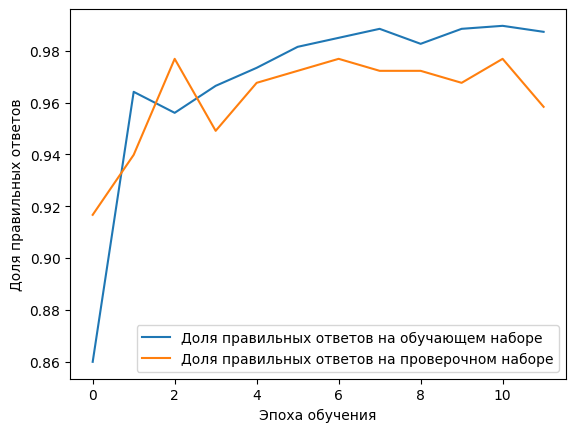

In [ ]:
plt.plot(history.history['accuracy'],
         label='Доля правильных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля правильных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля правильных ответов')
plt.legend()
plt.show()

In [ ]:
#tf.compat.v1.saved_model.save(model, '/content/drive/My Drive/saved_model_6')
model_2.save('/content/MobileNet_bg_2.keras')

In [ ]:
!mv "/content/MobileNet_bg_2.keras" "/content/drive/My Drive/model/MobileNet_bg_2.keras"

In [ ]:
# from google.colab import files
# files.download('proj_v2.h5')